# 資管四 唐瑋廷 B05705043 HW1

In [1]:
import numpy as np
import pickle
import operator
from math import modf
from multiprocessing import Pool

## Q1.1

### Build the class

In [2]:
class myknn_regressor():
    def __init__(self, k, mode='equal_weight'):
        
        self.k = k
        self.mode = mode
       
    def fit(self, x, y):
        
        self.x = x
        self.y = y
    
    def predict(self, x):
        
        pool = Pool()
        ret = pool.map(self._predict_one, list(x)) 
        pool.close()
        pool.join()
        
        return np.array(ret)
    
    def _predict_one(self, x_i):
        dis = self._cos_sim(x_i)
        dis = zip(dis, self.y)
        dis = sorted(dis, key=operator.itemgetter(0), reverse=True)[:self.k]
        year = [d[1] for d in dis]

        if self.mode == 'remove_outliers' and self.k >= 10:
            year = sorted(year)
            q1, q3 = self._quantile(year, 0.25), self._quantile(year, 0.75)
            iqr = q3 - q1

            year = [y for y in year if y<=q3+1.5*iqr and y>=q1-1.5*iqr]

        return (sum(year) / len(year))
    
    def _cos_sim(self, x):
        
        dis_list = []
        for x_i in self.x:
             dis_list.append(np.dot(x, x_i) / (np.linalg.norm(x) * np.linalg.norm(x_i)))
        
        return np.array(dis_list)
    
    def _quantile(self, n, p):
    
        pos = 1 + (len(n)-1)*p
        (pos_dec, pos_int) = modf(pos)
        pos_int = int(pos_int)
        quan = n[pos_int - 1] + (n[pos_int] - n[pos_int - 1]) * pos_dec
        
        return quan
    
    

#### I use cosine similarity to calculate the distant of two points. A larger cos_sim means that two points are more similar. 
#### In the function "predict()", I use multiprocessing to accelerate the process.

## Q1.2

#### Load the data & standardizing

In [3]:
with open('msd_data1.pickle', 'rb') as f:
    data = pickle.load(f)
    
X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']

mean_train, std_train = X_train.mean(axis=0), X_train.std(axis=0)
X_train = ((X_train - mean_train) / std_train)
mean_test, std_test = X_test.mean(axis=0), X_test.std(axis=0)
X_test = ((X_test - mean_test) / std_test)

#### RMSE

In [4]:
def rmse(p, gt):
    return np.sqrt(((p - gt)**2).mean())

- Create a knn regressor with k = 20 & equal weight mode
- Train the regressor using the training data
- Predict the first 20 data of the test data
- Present the prediction, comparing to the ground truth, and calculate the RMSE

In [5]:
myknn = myknn_regressor(20, 'equal_weight')
myknn.fit(X_train, Y_train)
pred = myknn.predict(X_test[:20])
print('prediction:', pred)
print('ground truth:', Y_test[:20])
print("RMSE:", rmse(pred, Y_test[:20]))

prediction: [1997.85 1999.6  1999.75 1989.1  1999.3  2000.05 1996.7  1987.3  2002.15
 2004.7  2002.05 2001.6  1996.6  1997.9  1991.5  1996.35 1992.2  2001.65
 2002.55 1999.8 ]
ground truth: [1998. 1988. 2005. 1982. 1990. 1995. 2005. 1994. 2005. 2009. 2007. 1996.
 2006. 2005. 1994. 1992. 2000. 2007. 2003. 2003.]
RMSE: 6.263585235310493


## Q1.3

#### Like what we do in Q1.2, only changing the mode from 'equal_weight' to 'remove_outlieres'

In [6]:
myknn = myknn_regressor(20, 'remove_outliers')
myknn.fit(X_train, Y_train)
pred = myknn.predict(X_test[:20])
print('prediction:', pred)
print('ground truth:', Y_test[:20])
print("RMSE:", rmse(pred, Y_test[:20]))

prediction: [1999.36842105 1999.6        2000.89473684 1989.1        2000.57894737
 2001.36842105 1998.05263158 1987.3        2004.9375     2005.31578947
 2003.15789474 2003.77777778 1998.15789474 1999.21052632 1995.22222222
 1996.35       1992.2        2005.22222222 2004.5        1999.8       ]
ground truth: [1998. 1988. 2005. 1982. 1990. 1995. 2005. 1994. 2005. 2009. 2007. 1996.
 2006. 2005. 1994. 1992. 2000. 2007. 2003. 2003.]
RMSE: 6.041849711927147


#### When we remove the outliers, the RMSE of the first 20 test data has slightly decreased.

## Q2

In [7]:
from sklearn.neighbors import KNeighborsRegressor
k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

#### Load the data & standardizing

In [8]:
with open('msd_data1.pickle', 'rb') as f:
    data = pickle.load(f)
    
X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']

mean_train, std_train = X_train.mean(axis=0), X_train.std(axis=0)
X_train = ((X_train - mean_train) / std_train)
mean_test, std_test = X_test.mean(axis=0), X_test.std(axis=0)
X_test = ((X_test - mean_test) / std_test)

#### Calculate the RMSE of eack selected value k.

In [9]:
pred_1 = []
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred_1.append(rmse(knn.predict(X_test), Y_test))

#### Repead again without standardizing

In [10]:
with open('msd_data1.pickle', 'rb') as f:
    data = pickle.load(f)
    
X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']

In [11]:
pred_2 = []
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred_2.append(rmse(knn.predict(X_test), Y_test))

### Doing again with my own knn regressor

In [12]:
with open('msd_data1.pickle', 'rb') as f:
    data = pickle.load(f)
    
X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']

mean_train, std_train = X_train.mean(axis=0), X_train.std(axis=0)
X_train = ((X_train - mean_train) / std_train)
mean_test, std_test = X_test.mean(axis=0), X_test.std(axis=0)
X_test = ((X_test - mean_test) / std_test)

In [13]:
pred_3 = []
for k in k_list:
    knn = myknn_regressor(k, 'remove_ouliers')
    knn.fit(X_train, Y_train)
    pred_3.append(rmse(knn.predict(X_test), Y_test))

### Plot

In [14]:
import matplotlib.pyplot as plt

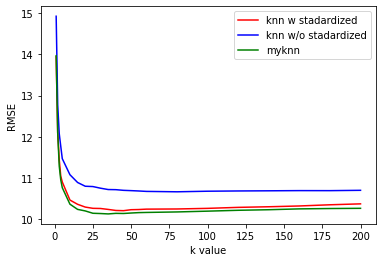

In [16]:
plt.plot(k_list, pred_1, 'r', k_list, pred_2, 'b', k_list, pred_3, 'g')
plt.ylabel('RMSE')
plt.xlabel('k value')
plt.legend(labels=['knn w stadardized', 'knn w/o stadardized', 'myknn'],  loc='best')
plt.show()

#### We can find that our own knn and knn of sklearn with standardized have similar performance. However, knn of sklearn without standardized has higher RMSE.
#### We can also find that when k is greater than 25, the RMSE keeps low.
#### In conclusion, our own knn regressor has the best performance on test data, and we should choose a big enough k value to build a robust regressor.